First few rows of the dataset:
  country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN    

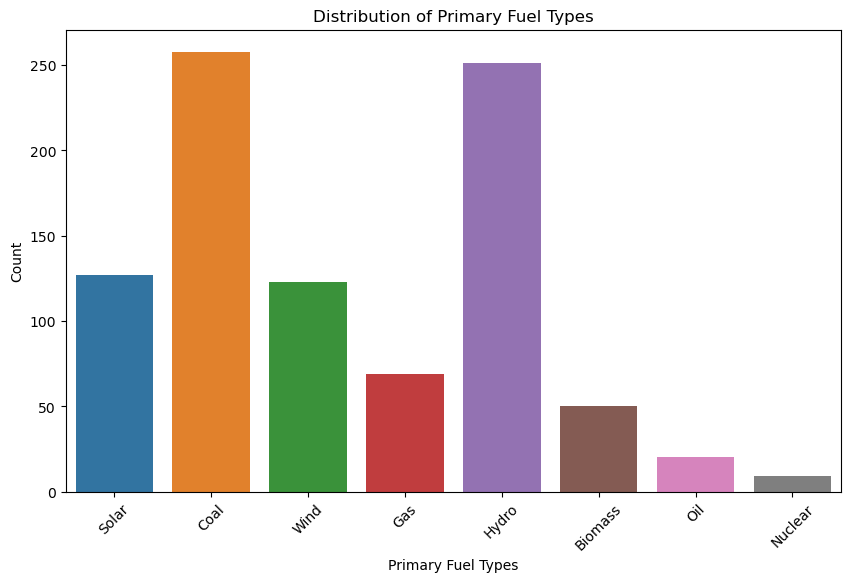

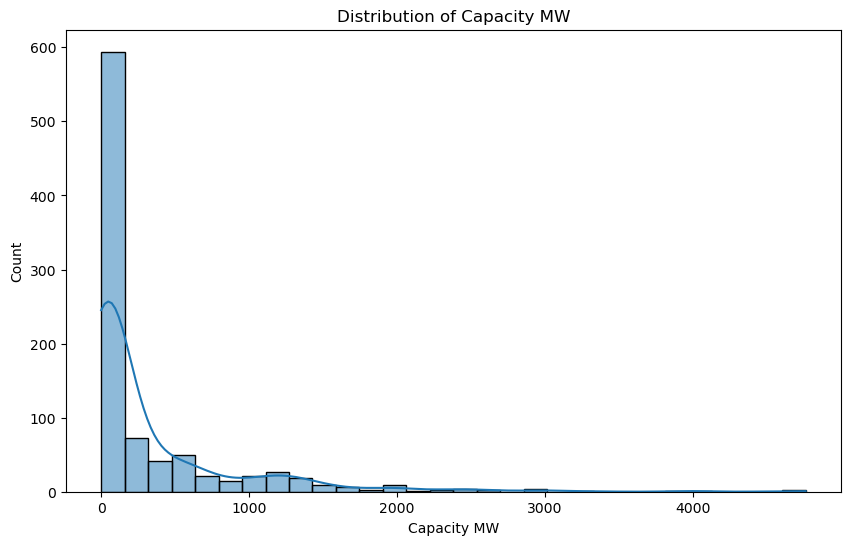

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

print("First few rows of the dataset:")
print(power_plant_data.head())
print("\nColumns in the Dataset:")
for column in power_plant_data.columns:
    print(column)

print("\nMissing values in the dataset:")
print(power_plant_data.isnull().sum())

unique_fuels = power_plant_data['primary_fuel'].unique()
print("\nUnique Fuel Types:", unique_fuels)

predicted_primary_fuel = power_plant_data['primary_fuel'].mode()[0]
print("\nPredicted Primary Fuel:", predicted_primary_fuel)

predicted_capacity_mw = power_plant_data['capacity_mw'].mean()
print("Predicted Capacity MW:", predicted_capacity_mw)

plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=power_plant_data)
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(power_plant_data['capacity_mw'], bins=30, kde=True)
plt.title('Distribution of Capacity MW')
plt.xlabel('Capacity MW')
plt.ylabel('Count')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.4175824175824176

Confusion Matrix:
[[ 0  0  0  4  0  0  1  0]
 [ 0 26  0 18  0  0  4  0]
 [ 0  6  0 11  0  0  1  0]
 [ 0  5  0 38  0  0 15  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0  4  0  0 12  0]
 [ 0  0  0 22  0  0  6  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.65      0.54      0.59        48
           2       0.00      0.00      0.00        18
           3       0.37      0.66      0.47        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.31      0.75      0.44        16
           7       0.00      0.00      0.00        28

    accuracy                           0.42       182
   macro avg       0.17      0.24      0.19       182
weighted avg       0.32      0.42      0.34       182



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Accuracy: 0.45604395604395603

Confusion Matrix:
[[ 2  1  0  1  0  0  1  0]
 [ 1 29  2 10  0  0  4  2]
 [ 1  8  3  5  0  0  1  0]
 [ 6 11  5 27  0  0  8  1]
 [ 0  2  0  0  1  0  0  0]
 [ 1  0  0  3  0  2  0  0]
 [ 1  1  0  2  0  0 11  1]
 [ 6  3  0  6  0  1  4  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.40      0.17         5
           1       0.53      0.60      0.56        48
           2       0.30      0.17      0.21        18
           3       0.50      0.47      0.48        58
           4       1.00      0.33      0.50         3
           5       0.67      0.33      0.44         6
           6       0.38      0.69      0.49        16
           7       0.67      0.29      0.40        28

    accuracy                           0.46       182
   macro avg       0.52      0.41      0.41       182
weighted avg       0.51      0.46      0.46       182



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.46703296703296704

Confusion Matrix:
[[ 2  1  0  0  0  0  1  1]
 [ 1 25  2 12  1  0  4  3]
 [ 1  7  4  5  0  0  1  0]
 [ 6  6  5 30  0  0  8  3]
 [ 0  2  0  0  1  0  0  0]
 [ 0  0  0  3  0  3  0  0]
 [ 1  1  0  2  0  0 11  1]
 [ 5  2  0  3  0  2  7  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.40      0.19         5
           1       0.57      0.52      0.54        48
           2       0.36      0.22      0.28        18
           3       0.55      0.52      0.53        58
           4       0.50      0.33      0.40         3
           5       0.60      0.50      0.55         6
           6       0.34      0.69      0.46        16
           7       0.53      0.32      0.40        28

    accuracy                           0.47       182
   macro avg       0.45      0.44      0.42       182
weighted avg       0.50      0.47      0.47       182



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Accuracy: 0.44505494505494503

Confusion Matrix:
[[ 0  0  0  5  0  0  0  0]
 [ 0 26  0 22  0  0  0  0]
 [ 0  7  0 11  0  0  0  0]
 [ 0  7  0 48  0  0  3  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0  9  0  0  7  0]
 [ 0  0  0 25  0  0  3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.54      0.57        48
           2       0.00      0.00      0.00        18
           3       0.38      0.83      0.52        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.54      0.44      0.48        16
           7       0.00      0.00      0.00        28

    accuracy                           0.45       182
   macro avg       0.19      0.23      0.20       182
weighted avg       0.33      0.45      0.36       182



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Decision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
print("Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Accuracy:", dt_cv_scores.mean())

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("Confusion Matrix:")
print(dt_conf_matrix)

print("\nRandom Forest:")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_conf_matrix)

print("\nSupport Vector Machine:")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validation Scores:", svm_cv_scores)
print("Mean CV Accuracy:", svm_cv_scores.mean())

svm_predictions = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Confusion Matrix:")
print(svm_conf_matrix)



Decision Tree:
Cross-Validation Scores: [0.43956044 0.50549451 0.55248619 0.5359116  0.54696133]
Mean CV Accuracy: 0.5160828122154089
Accuracy: 0.45604395604395603
Precision: 0.5054960365305193
Recall: 0.45604395604395603
F1 Score: 0.4555440048972582
Confusion Matrix:
[[ 2  1  0  1  0  0  1  0]
 [ 1 29  2 10  0  0  4  2]
 [ 1  8  3  5  0  0  1  0]
 [ 6 11  5 27  0  0  8  1]
 [ 0  2  0  0  1  0  0  0]
 [ 1  0  0  3  0  2  0  0]
 [ 1  1  0  2  0  0 11  1]
 [ 6  3  0  6  0  1  4  8]]

Random Forest:
Cross-Validation Scores: [0.44505495 0.51098901 0.53038674 0.55248619 0.55248619]
Mean CV Accuracy: 0.518280614413211
Accuracy: 0.46703296703296704
Precision: 0.5027641476170888
Recall: 0.46703296703296704
F1 Score: 0.47146909614588545
Confusion Matrix:
[[ 2  1  0  0  0  0  1  1]
 [ 1 25  2 12  1  0  4  3]
 [ 1  7  4  5  0  0  1  0]
 [ 6  6  5 30  0  0  8  3]
 [ 0  2  0  0  1  0  0  0]
 [ 0  0  0  3  0  3  0  0]
 [ 1  1  0  2  0  0 11  1]
 [ 5  2  0  3  0  2  7  9]]

Support Vector Machine:
Cr

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Random Forest with Hyperparameter Tuning:")
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())

rf_predictions = best_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_conf_matrix)

print("\nSupport Vector Machine with Feature Scaling:")
svm_model = SVC(random_state=42)

svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validation Scores:", svm_cv_scores)
print("Mean CV Accuracy:", svm_cv_scores.mean())

svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Confusion Matrix:")
print(svm_conf_matrix)


Random Forest with Hyperparameter Tuning:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Cross-Validation Scores: [0.44505495 0.53846154 0.55248619 0.49723757 0.57458564]
Mean CV Accuracy: 0.5215651751563353
Accuracy: 0.47802197802197804
Precision: 0.5231823185025155
Recall: 0.47802197802197804
F1 Score: 0.48562237063447716
Confusion Matrix:
[[ 1  1  0  0  0  0  1  2]
 [ 1 25  2 12  1  0  4  3]
 [ 1  6  4  6  0  0  1  0]
 [ 6  7  4 30  0  0  8  3]
 [ 0  2  0  0  1  0  0  0]
 [ 1  0  0  3  0  2  0  0]
 [ 1  0  0  3  0  0 11  1]
 [ 4  1  0  6  0  0  4 13]]

Support Vector Machine with Feature Scaling:
Cross-Validation Scores: [0.37912088 0.38461538 0.42541436 0.41436464 0.4198895 ]
Mean CV Accuracy: 0.4046809544047113
Accuracy: 0.44505494505494503
Precision: 0.3282081237614077
Recall: 0.44505494505494503
F1 Score: 0.3594152688177104
Confusion Matrix:
[[ 0  0  0  5  0  0  0  0]
 [ 0 26  0 22  0  0  0  0]
 [ 0  7  0 11  0  0  0  

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

dataset_path = "C:\\Users\\sv697\\Downloads\\database_IND (1).csv"
power_plant_data = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
power_plant_data['primary_fuel_encoded'] = label_encoder.fit_transform(power_plant_data['primary_fuel'])

X = power_plant_data[['capacity_mw']]
y = power_plant_data['primary_fuel_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Decision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("Confusion Matrix:")
print(dt_conf_matrix)

print("\nRandom Forest with Hyperparameter Tuning:")
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

rf_predictions = best_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_conf_matrix)

print("\nSupport Vector Machine with Feature Scaling:")
svm_model = SVC(random_state=42)

svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validation Scores:", svm_cv_scores)
print("Mean CV Accuracy:", svm_cv_scores.mean())

svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Confusion Matrix:")
print(svm_conf_matrix)

models_metrics = {
    'Decision Tree': {'accuracy': dt_accuracy, 'precision': dt_precision, 'recall': dt_recall, 'f1': dt_f1},
    'Random Forest': {'accuracy': rf_accuracy, 'precision': rf_precision, 'recall': rf_recall, 'f1': rf_f1},
    'SVM': {'accuracy': svm_accuracy, 'precision': svm_precision, 'recall': svm_recall, 'f1': svm_f1}
}

best_model_name = max(models_metrics, key=lambda x: models_metrics[x]['accuracy'])
print("\nBest Model Based on Accuracy:", best_model_name)


Decision Tree:
Accuracy: 0.45604395604395603
Precision: 0.5054960365305193
Recall: 0.45604395604395603
F1 Score: 0.4555440048972582
Confusion Matrix:
[[ 2  1  0  1  0  0  1  0]
 [ 1 29  2 10  0  0  4  2]
 [ 1  8  3  5  0  0  1  0]
 [ 6 11  5 27  0  0  8  1]
 [ 0  2  0  0  1  0  0  0]
 [ 1  0  0  3  0  2  0  0]
 [ 1  1  0  2  0  0 11  1]
 [ 6  3  0  6  0  1  4  8]]

Random Forest with Hyperparameter Tuning:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.47802197802197804
Precision: 0.5231823185025155
Recall: 0.47802197802197804
F1 Score: 0.48562237063447716
Confusion Matrix:
[[ 1  1  0  0  0  0  1  2]
 [ 1 25  2 12  1  0  4  3]
 [ 1  6  4  6  0  0  1  0]
 [ 6  7  4 30  0  0  8  3]
 [ 0  2  0  0  1  0  0  0]
 [ 1  0  0  3  0  2  0  0]
 [ 1  0  0  3  0  0 11  1]
 [ 4  1  0  6  0  0  4 13]]

Support Vector Machine with Feature Scaling:
Cross-Validation Scores: [0.37912088 0.38461538 0.42541436 0.41436464 0.4198895 ]
M

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import joblib
joblib.dump(best_rf_model, 'best_model_random_forest.joblib')
loaded_model = joblib.load('best_model_random_forest.joblib')
